In [2]:
pip install gradio

     |████████████████████████████████| 979 kB 5.3 MB/s 
     |████████████████████████████████| 206 kB 30.9 MB/s 
     |████████████████████████████████| 2.0 MB 32.0 MB/s 
     |████████████████████████████████| 3.6 MB 32.1 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 961 kB 38.9 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=a0867b847fe6fca0256262e79922a9e9ba831cdd622418c9e53acdcae209a6f7
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=3cb4dd047c024371eba0ddc6645d2d0140b06d94b6fd279a31a398b7319d0d75
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [3]:
import gradio as gr

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import zipfile
import os

In [5]:
import zipfile
import os

In [6]:
!wget --no-check-certificate \
    "https://github.com/shivisharma2k/rps/archive/refs/heads/main.zip" \
    -O "/tmp/rps.zip"


zip_ref = zipfile.ZipFile('/tmp/rps.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2021-12-14 04:36:10--  https://github.com/shivisharma2k/rps/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/shivisharma2k/rps/zip/refs/heads/main [following]
--2021-12-14 04:36:10--  https://codeload.github.com/shivisharma2k/rps/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip            [   <=>              ] 152.89M  24.2MB/s    in 6.2s    

2021-12-14 04:36:17 (24.6 MB/s) - ‘/tmp/rps.zip’ saved [160312941]



In [7]:
print('Test paper' , len(os.listdir('/tmp/rps-main/paper')))
print('Test set rock' , len(os.listdir('/tmp/rps-main/rock')))
print('Test set scissors' , len(os.listdir('/tmp/rps-main/scissors')))

Test paper 712
Test set rock 726
Test set scissors 750


/tmp/rps-main/paper/9qKKOliWXD7oDZOd.png


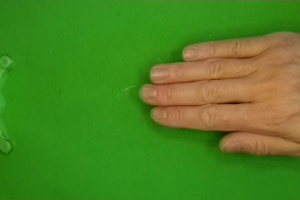

In [8]:
import pathlib
data_dir = pathlib.Path('/tmp/rps-main')
paper = list(data_dir.glob('paper/*'))
print(paper[0])
PIL.Image.open(str(paper[0]))

In [9]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2188 files belonging to 3 classes.
Using 1751 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['paper', 'rock', 'scissors']


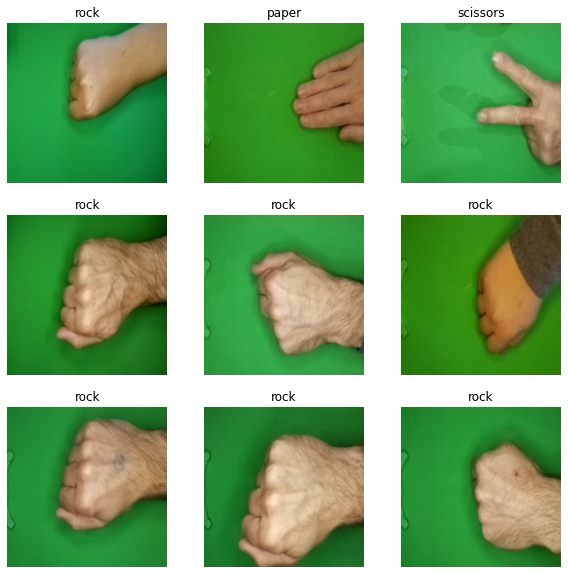

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #rescaling the input to new range
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


55/55 [==============================] - 69s 1s/step - loss: 0.8252 - accuracy: 0.6596 - val_loss: 0.4412 - val_accuracy: 0.8307
Epoch 2/10
55/55 [==============================] - 60s 1s/step - loss: 0.3353 - accuracy: 0.8806 - val_loss: 0.2081 - val_accuracy: 0.9314
Epoch 3/10
55/55 [==============================] - 59s 1s/step - loss: 0.1587 - accuracy: 0.9412 - val_loss: 0.1156 - val_accuracy: 0.9451
Epoch 4/10
55/55 [==============================] - 59s 1s/step - loss: 0.0929 - accuracy: 0.9692 - val_loss: 0.1272 - val_accuracy: 0.9565
Epoch 5/10
55/55 [==============================] - 59s 1s/step - loss: 0.0641 - accuracy: 0.9743 - val_loss: 0.0964 - val_accuracy: 0.9703
Epoch 6/10
55/55 [==============================] - 59s 1s/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 0.0808 - val_accuracy: 0.9703
Epoch 7/10
55/55 [==============================] - 59s 1s/step - loss: 0.0199 - accuracy: 0.9931 - val_loss: 0.0873 - val_accuracy: 0.9703
Epoch 8/10
55/55 [=============

In [16]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://15512.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app
